In [ ]:
# Bank marketing dataset 

"""Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

"""

In [1]:
# Import packages 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [29]:
# Set up data variable

path = "C:/Portfolio/Data Engineer Track/Thinkful/Assignments/KNN Classifier/bank-full.xlsx"

In [30]:
# Establish dataframe variable 

df = pd.read_excel(path)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [ ]:
""" We will use:  
x (age and campaign)
y (whether the potential customer signed up for an account or not)
""""

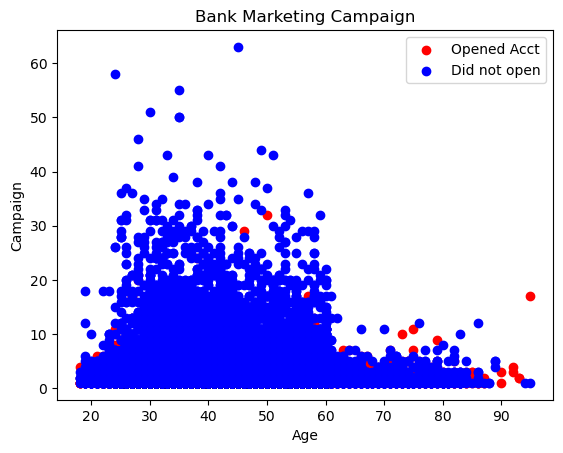

In [31]:
# Look at the data as a scatterplot

plt.scatter(
df[df["y"] == "yes"].age,
df[df["y"] == "yes"].campaign,
color = "red"
)

plt.scatter(
df[df["y"] == "no"].age,
df[df["y"] == "no"].campaign,
color = "blue"
)

plt.legend(["Opened Acct", "Did not open"])
plt.title("Bank Marketing Campaign")
plt.xlabel("Age")
plt.ylabel("Campaign")
plt.show()

In [32]:
# Fit and predict the model for the nearest neighbor (one point)

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors = 1)
X = df[["age", "campaign"]]
Y = df.y
neighbors.fit(X,Y)

## Predict for age 30 and 10 contacts
neighbors.predict([[30, 10]])

C:\Users\rakim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\rakim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['no'], dtype=object)

In [39]:
# Fit and predict model for 10 total K-Nearest Neighbors

neighbors = KNeighborsClassifier(n_neighbors = 10)
X = df[["age", "campaign"]]
Y = df[["y"]]
neighbors.fit(X,Y)

## Predict for age 70 and 10 contacts
print(neighbors.predict([[70, 10]]))
print(neighbors.predict_proba([[70, 10]]))


['no']
[[0.8 0.2]]


C:\Users\rakim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rakim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\rakim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\

In [ ]:
""""
8 voted no and 2 voted yes for age 70 and 10 contacts. It appears the liklihood
# of yes occurring increases with age. 

""""